In [2]:
#! /bin/env python3

import pickle

def load_pkl(fname):
	with open(fname,'rb') as f:
		return pickle.load(f)

def save_pkl(fname,obj):
	with open(fname,'wb') as f:
		pickle.dump(obj,f)

        
# Loading packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import skimage
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Loading in the train data
train_data = load_pkl('../train_data.pkl')

# Loading in the labels
train_labels = np.load('../finalLabelsTrain.npy')

# When attempting to only classify a and b, looking only at reduced set.
ab_train_data = train_data[np.logical_or((train_labels == 1),(train_labels == 2))]
ab_train_labels = train_labels[np.logical_or((train_labels == 1),(train_labels == 2))]

rot_list = []
j = 0

for i in range(1600):
    if(np.shape(ab_train_data[i])[0] < np.shape(ab_train_data[i])[1]):
        rot_list.append(j)
    j = j + 1

rot_list = [241,242,243,244,245,246,247,250,
           251,252,253,254,255,256,257,258,259,
           500,501,502,503,504,505,506,507,508,509,
           510,511,512,513,514,515,516,517,518,519]

# Some things should just be thrown out
trash_list = [240,248,249,960]

# Rotating the above images by 270 degrees, seems to be the only way things went wrong
for index in rot_list:
    img = (ab_train_data[index])
    lx, ly = img.shape
    rot_img = ndimage.rotate(img, 270)
    ab_train_data[index] = rot_img

# For every image we resize to (50,50)
for i in range(1600):
    ab_train_data[i] = skimage.transform.resize(np.asarray(ab_train_data[i]), (50,len(np.array(ab_train_data[i])[0,:])))

In [3]:
def get_measurements(img):
    
    yaxis = pd.Series([np.count_nonzero(img[i,:])*[i+1] 
           for i in np.arange(np.shape(img)[0])], name='yaxis').explode()
    xaxis = pd.Series([np.count_nonzero(img[:,i])*[i+1] 
           for i in np.arange(np.shape(img)[1])], name='xaxis').explode()   
    
    yrange = (np.max(yaxis) - np.min(yaxis))
    xrange = (np.max(xaxis) - np.min(xaxis))   
    
    rangediff = abs(yrange - xrange)
    
    return yaxis, xaxis, rangediff

yaxis_lis=[]
xaxis_lis=[]
rangediff_lis=[]
yargmax=[]
xargmax=[]
xaxismed=[]

for img in ab_train_data:
    
    yaxis, xaxis, rangediff = get_measurements(img)
        
    yarg = yaxis.reset_index().groupby('yaxis').count().values.argmax()
    xarg = xaxis.reset_index().groupby('xaxis').count().values.argmax()
    
    yargmax.append(yarg)
    xargmax.append(xarg)
    
    yaxis_lis.append(yaxis)
    xaxis_lis.append(xaxis)
    xaxismed.append(xaxis.median())
    rangediff_lis.append(rangediff)
    
X = np.array([np.array(x) for x in list(zip(yargmax, xaxismed, rangediff_lis, xargmax))])
y = ab_train_labels

In [12]:
b = []
a = []

for i in list(enumerate(ab_train_labels)):
    if i[1] == 2:
        b.append(i[0])
    elif i[1] == 1:
        a.append(i[0])

(array([0.0125 , 0.015  , 0.0075 , 0.0025 , 0.00875, 0.01   , 0.005  ,
        0.01375, 0.02125, 0.0125 , 0.02   , 0.025  , 0.015  , 0.02125,
        0.04125, 0.04   , 0.00375, 0.0825 , 0.01375, 0.0425 , 0.1225 ,
        0.04875, 0.09625, 0.075  , 0.02875, 0.03   , 0.0275 , 0.0675 ,
        0.02   , 0.02625, 0.01625, 0.015  , 0.005  , 0.00625, 0.     ,
        0.     , 0.     , 0.00125, 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

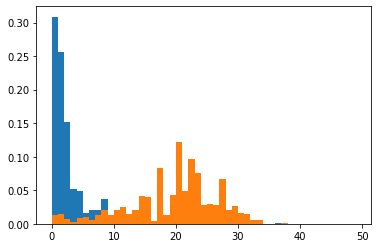

In [20]:
plt.hist(np.array(rangediff_lis)[a],bins=np.arange(0,50,1),density=True)
plt.hist(np.array(rangediff_lis)[b],bins=np.arange(0,50,1),density=True)

(array([  5.,  38.,  96., 130., 110.,  86.,  76.,  56.,  49.,  29.,  29.,
         14.,  15.,  14.,   7.,   4.,   5.,   3.,   8.,   6.,   0.,   3.,
          1.,   2.,   1.,   3.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

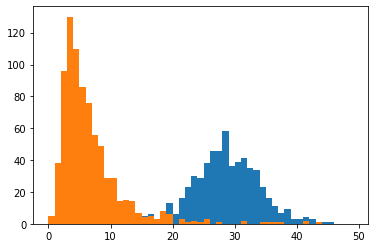

In [22]:
plt.hist(np.array(xargmax)[a], bins=np.arange(0,50,1))
plt.hist(np.array(xargmax)[b], bins=np.arange(0,50,1))

(array([ 0.,  0.,  0.,  3., 21., 45., 45., 78., 66., 90., 57., 80., 51.,
        45., 36., 36., 29., 23., 14., 18.,  8.,  8., 10.,  7.,  1.,  3.,
         9.,  0.,  0.,  1.,  3.,  1.,  1.,  4.,  1.,  2.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

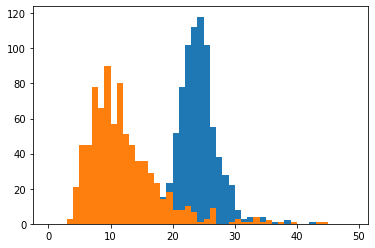

In [23]:
plt.hist(np.array(xaxismed)[a], bins=np.arange(0,50,1))
plt.hist(np.array(xaxismed)[b], bins=np.arange(0,50,1))

In [ ]:
plt.hist(np.array(xaxismed)[a], bins=np.arange(0,50,1))
plt.hist(np.array(xaxismed)[b], bins=np.arange(0,50,1))

In [5]:
def run_model(X, y, penalty='l1', n_features=4):

    avg_scores = []

    for i in np.arange(500):

        scores = []

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(1,500))

        skf.get_n_splits(X,y)

        for train_index, test_index in skf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            clf = LogisticRegression(solver='liblinear', penalty=penalty).fit(X_train, y_train)

            clf.predict(X_test)

            scores.append(clf.score(X_test, y_test))

        avg_scores.append(np.mean(scores))


    plt.hist(avg_scores)
    plt.xlim((min(avg_scores)-0.02,max(avg_scores)+0.02))
    plt.axvline(np.mean(avg_scores), c='black')

    if n_features == 4:
        print("Mean accuracy score for ", penalty, " penalty:", np.mean(avg_scores))

    else:
        print("Mean accuracy score for ", n_features, " features:", np.mean(avg_scores))

Mean accuracy score for  l1  penalty: 0.9351324999999999


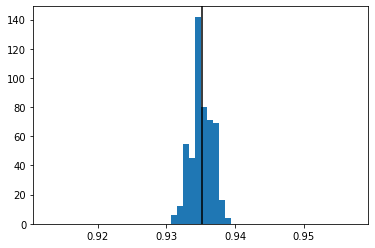

In [7]:
run_model(X, y)

Mean accuracy score for  l2  penalty: 0.93512875


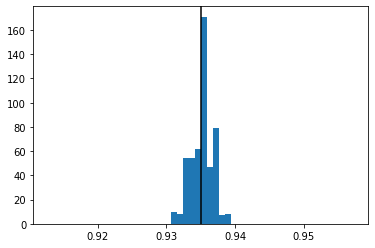

In [6]:
run_model(X, y, penalty='l2')

Mean accuracy score for  2  features: 0.93208375


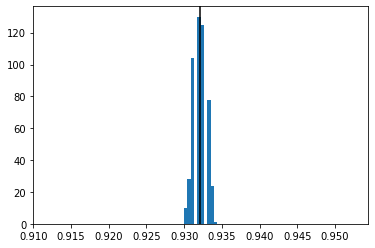

In [10]:
X2 = np.array([np.array(x) for x in list(zip(rangediff_lis, xargmax))])

run_model(X2, y, n_features=2)

Mean accuracy score for  3  features: 0.93070875


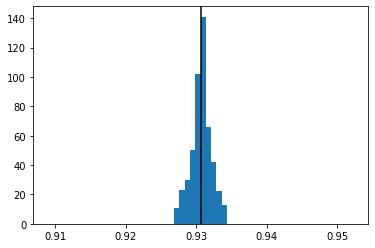

In [11]:
X3 = np.array([np.array(x) for x in list(zip(rangediff_lis, xargmax, xaxismed))])

run_model(X3, y, n_features=3)